In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/heart_2020_cleaned.csv")

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.info()

In [ ]:
le = LabelEncoder()
columns_to_encoded = ["HeartDisease", "Smoking", "Stroke", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "SkinCancer", "KidneyDisease", "AlcoholDrinking", "PhysicalActivity"]
for column in columns_to_encoded:
  df[column] = le.fit_transform(df[column])

df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,2,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,2,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,Female,75-79,Black,0,0,Fair,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,Female,70-74,White,0,1,Fair,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,Female,80 or older,White,2,0,Good,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,Female,80 or older,White,1,0,Fair,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,Male,65-69,White,0,1,Good,10.0,0,0,0


In [ ]:
df["GenHealth"] = df["GenHealth"].replace(["Very good", "Good", "Excellent", "Fair", "Poor"], [2,3,1,4,5])

<ipython-input-41-25b451b0a716>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")


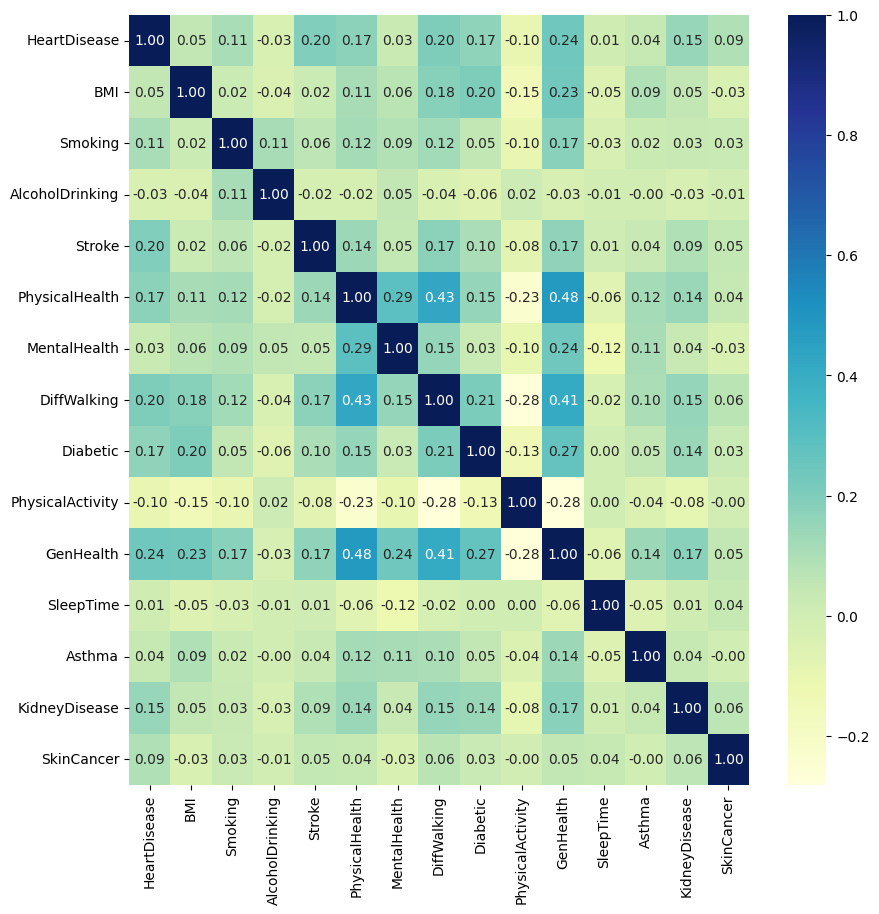

In [ ]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

In [ ]:
df.drop(["AlcoholDrinking", "MentalHealth",  "AgeCategory", "Race", "SleepTime", "Asthma", "PhysicalActivity"], inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   HeartDisease    319795 non-null  int64  
 1   BMI             319795 non-null  float64
 2   Smoking         319795 non-null  int64  
 3   Stroke          319795 non-null  int64  
 4   PhysicalHealth  319795 non-null  float64
 5   DiffWalking     319795 non-null  int64  
 6   Sex             319795 non-null  object 
 7   Diabetic        319795 non-null  int64  
 8   GenHealth       319795 non-null  int64  
 9   KidneyDisease   319795 non-null  int64  
 10  SkinCancer      319795 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 26.8+ MB


In [ ]:
df["Sex"] = df["Sex"].astype('category')

In [ ]:
sex = pd.get_dummies(df["Sex"], drop_first=True)

In [ ]:
df = pd.concat([df, sex], axis=1)

In [ ]:
df.drop("Sex", axis=1, inplace=True)

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,DiffWalking,Diabetic,GenHealth,KidneyDisease,SkinCancer,Male
0,0,16.60,1,0,3.0,0,2,2,0,1,0
1,0,20.34,0,1,0.0,0,0,2,0,0,0
2,0,26.58,1,0,20.0,0,2,4,0,0,1
3,0,24.21,0,0,0.0,0,0,3,0,1,0
4,0,23.71,0,0,28.0,1,0,2,0,0,0


In [ ]:
x = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=101)

In [ ]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
accuracy = round(accuracy_score(y_pred, y_test) *100, 2)
print(f"Model Accuracy: {accuracy}%")

Model Accuracy: 91.41%


In [ ]:
import pickle

data = {"model": lr}
with open("classprediction_model.pkl", "wb") as file:
  pickle.dump(data, file)